# Double 7's Average Portfolio (Short Term Trading Strategies that Work)

    1. The Security is above its 200-day moving average or X-day ma
    2. The Security closes at a X-day low, buy.
    3. If the Security closes at a X-day high, sell your long position.
    
    Instead of using a single period like 7 and allocating all of the capital to it,
    the capital is split between the number of periods that will be used,
    for example [5, 6, 7] = 33% each).

In [1]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd

import pinkfish as pf
import strategy

# Format price data.
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# Set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
# Symbol Lists
symbol = 'SPY'
capital = 10000
start = datetime.datetime(*pf.ALPHA_BEGIN)
#start = datetime.datetime(*pf.SP500_BEGIN)
end = datetime.datetime.now()

In [4]:
options = {
    'use_adj' : False,
    'use_cache' : True,
    'margin' : 2.0,
    'periods' : [5,6,7,8,9],
    'sma' : 70,
    'use_regime_filter' : True,
}

Run Strategy

In [5]:
s = strategy.Strategy(symbol, capital, start, end, options=options)
s.run()

In [6]:
s.ts

,SPY_7_close,SPY_8_close,SPY_6_close,SPY_9_close,SPY_5_close,regime,sma,period_high5,period_low5,period_high6,period_low6,period_high7,period_low7,period_high8,period_low8,period_high9,period_low9
date,,,,,,,,,,,,,,,,,
1993-11-11,46.38,46.38,46.38,46.38,46.38,1.00,46.11,46.50,46.06,46.50,45.84,46.50,45.84,46.94,45.84,46.97,45.84
1993-11-12,46.59,46.59,46.59,46.59,46.59,2.00,46.13,46.59,46.12,46.59,46.06,46.59,45.84,46.59,45.84,46.94,45.84
1993-11-15,46.56,46.56,46.56,46.56,46.56,3.00,46.16,46.59,46.16,46.59,46.12,46.59,46.06,46.59,45.84,46.59,45.84
1993-11-16,46.78,46.78,46.78,46.78,46.78,4.00,46.18,46.78,46.38,46.78,46.16,46.78,46.12,46.78,46.06,46.78,45.84
1993-11-17,46.53,46.53,46.53,46.53,46.53,5.00,46.20,46.78,46.38,46.78,46.38,46.78,46.16,46.78,46.12,46.78,46.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-09,467.38,467.38,467.38,467.38,467.38,346.00,446.49,468.93,464.72,468.93,461.90,468.93,460.04,468.93,459.25,468.93,458.32
2021-11-10,463.62,463.62,463.62,463.62,463.62,347.00,446.81,468.93,463.62,468.93,463.62,468.93,461.90,468.93,460.04,468.93,459.25
2021-11-11,463.77,463.77,463.77,463.77,463.77,348.00,447.16,468.93,463.62,468.93,463.62,468.93,463.62,468.93,461.90,468.93,460.04


View log DataFrames: raw trade log, trade log, and daily balance

In [7]:
s.rlog.head()

,date,seq_num,price,shares,entry_exit,direction,symbol
0,1993-11-18,0,46.41,86,entry,LONG,SPY_5
1,1993-11-19,1,46.31,86,entry,LONG,SPY_7
2,1993-11-19,2,46.31,86,entry,LONG,SPY_8
3,1993-11-19,3,46.31,86,entry,LONG,SPY_6
4,1993-11-22,4,46.03,85,entry,LONG,SPY_9


In [8]:
s.tlog.tail()

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
1593,2021-09-28,433.72,2021-10-06,434.90,1.18,588.82,499,539833.02,LONG,SPY_5
1594,2021-09-30,429.14,2021-10-06,434.90,5.76,2638.07,458,542471.09,LONG,SPY_6
1595,2021-10-12,433.62,2021-10-14,442.50,8.88,4484.40,505,546955.49,LONG,SPY_5
1596,2021-11-10,463.62,2021-11-15,467.43,3.81,1828.80,480,548784.29,LONG,SPY_6
1597,2021-11-10,463.62,2021-11-15,467.43,3.81,1828.80,480,550613.09,LONG,SPY_5


In [9]:
s.dbal.tail()

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2021-11-09,556955.49,556955.49,556955.49,0,556955.49,1.00,-
2021-11-10,556955.49,556955.49,556955.49,960,111880.30,1.00,O
2021-11-11,557099.48,557099.48,557099.48,960,111880.30,1.00,-
2021-11-12,560459.48,560459.48,560459.48,960,111880.30,1.00,-
2021-11-15,560613.09,560613.09,560613.09,0,560613.09,1.00,X


Generate strategy stats - display all available stats

In [10]:
pf.print_full(s.stats)

start                                                  1993-11-11
end                                                    2021-11-15
beginning_balance                                           10000
ending_balance                                          560613.09
total_net_profit                                        550613.09
gross_profit                                           1122635.78
gross_loss                                             -572022.69
profit_factor                                                1.96
return_on_initial_capital                                 5506.13
annual_return_rate                                          15.46
trading_period                           28 years 0 months 4 days
pct_time_in_market                                          43.68
margin                                                       2.00
avg_leverage                                                 1.25
max_leverage                                                 2.39
min_levera

View Performance by Symbol

,cumul_total,weight,pct_cumul_total,relative_performance
SPY_7,"$121,191.20",0.20,0.22,1.10
SPY_8,"$90,602.54",0.20,0.16,0.82
SPY_6,"$122,117.38",0.20,0.22,1.11
SPY_9,"$96,199.85",0.20,0.17,0.87
SPY_5,"$120,502.12",0.20,0.22,1.09
TOTAL,"$550,613.09",1.00,1.00,1.00


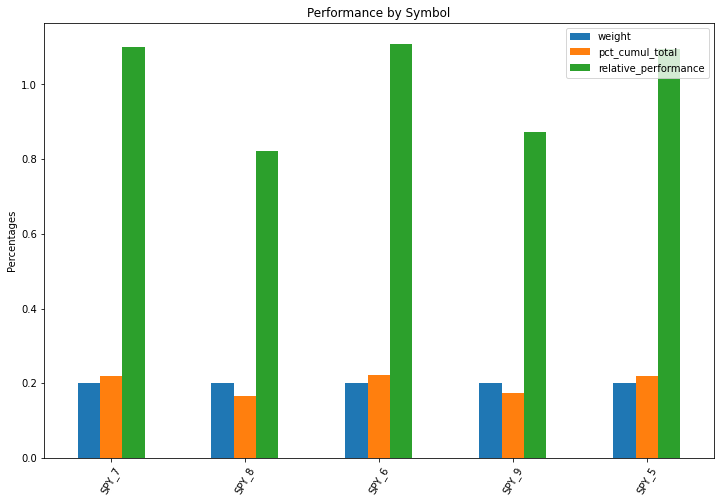

In [11]:
weights = {symbol: 1 / len(s.symbols) for symbol in s.symbols}
totals = s.portfolio.performance_per_symbol(weights=weights)
totals

,SPY_7,SPY_8,SPY_6,SPY_9,SPY_5
SPY_7,1.00,1.00,1.00,1.00,1.00
SPY_8,1.00,1.00,1.00,1.00,1.00
SPY_6,1.00,1.00,1.00,1.00,1.00
SPY_9,1.00,1.00,1.00,1.00,1.00
SPY_5,1.00,1.00,1.00,1.00,1.00


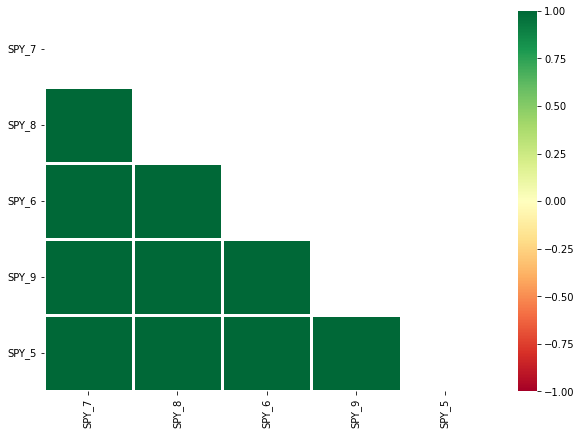

In [12]:
corr_df = s.portfolio.correlation_map(s.ts)
corr_df

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [13]:
benchmark = pf.Benchmark(symbol, s.capital, s.start, s.end, use_adj=True)
benchmark.run()

Plot Equity Curves: Strategy vs Benchmark

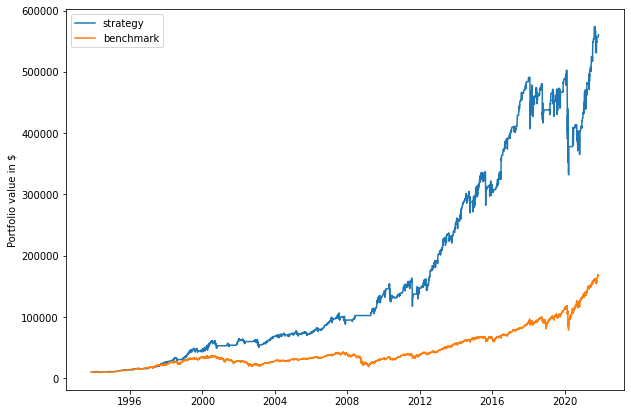

In [14]:
pf.plot_equity_curve(s.dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,15.46,10.61
max_closed_out_drawdown,-33.90,-55.16
annualized_return_over_max_drawdown,0.46,0.19
best_month,23.98,23.59
worst_month,-32.49,-30.98
sharpe_ratio,0.82,0.63
sortino_ratio,0.68,0.79
monthly_std,4.08,4.49
annual_std,16.75,17.27


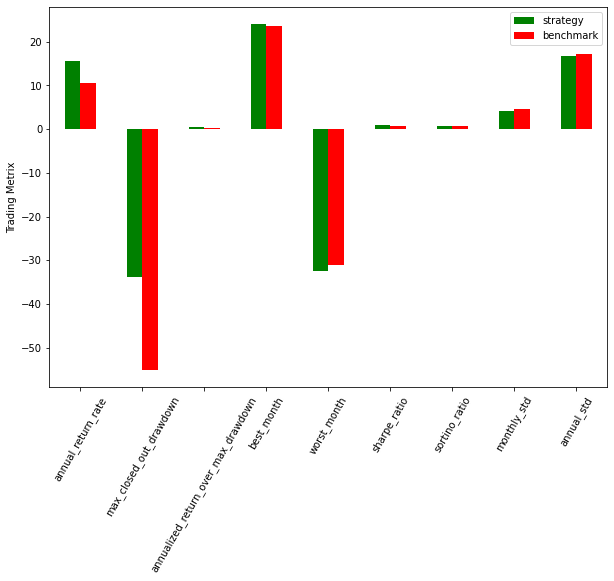

In [15]:
df = pf.plot_bar_graph(s.stats, benchmark.stats)
df

Analysis: Kelly Criterian

In [16]:
kelly = pf.kelly_criterion(s.stats, benchmark.stats)
kelly

sharpe_ratio            0.82
sharpe_ratio_max        0.86
sharpe_ratio_min        0.78
strategy risk           0.17
instrument risk         0.17
optimal target risk     0.82
half kelly criterion    0.41
aggressive leverage     4.75
moderate leverage       2.38
conservative leverage   2.26
dtype: float64